In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import csv
%matplotlib inline

In [2]:
#Import the csv file
titanic= pd.read_csv('titanic-passengers.csv', header = 'infer', sep= ';')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
#show general info 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [5]:
#show statistical info
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#fill the nan values with the appropriate values
titanic['Age'].fillna(value=titanic['Age'].mean(), inplace=True)
titanic['Embarked'].fillna(value=titanic.mode().iloc[0], inplace=True)
titanic['Cabin'].fillna(value=titanic['Cabin'].mode().iloc[1], inplace=True)


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

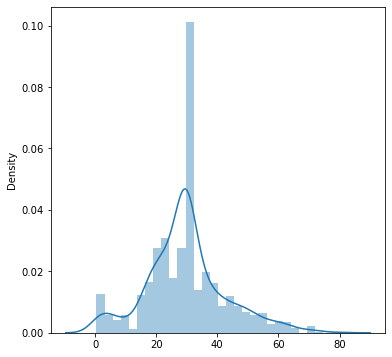

In [7]:
fig,ax= plt.subplots(figsize=(6,6))
#distribution of the age variable
sns.distplot(x = titanic['Age'])

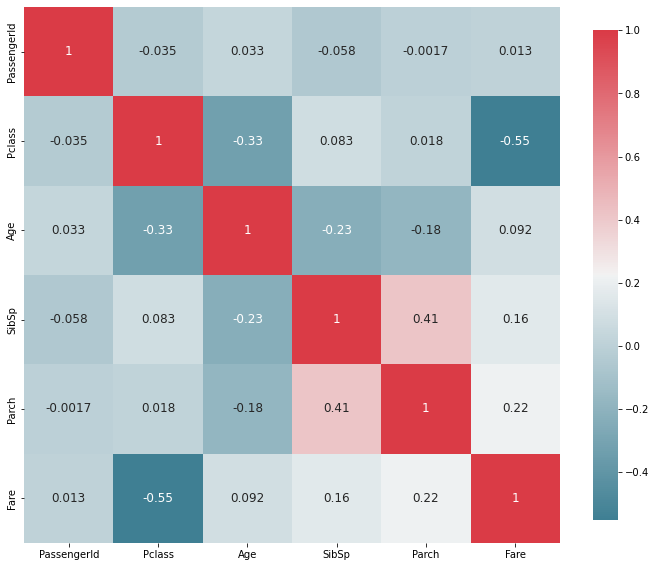

In [8]:
def plot_correlation_map( df ):
    
    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( titanic )

In [9]:
#Feature selection
X=titanic[['Age','Pclass','Sex']]
X['Sex']=X['Sex'].map({"female":1, "male": 0})
Y=titanic['Survived'].map({'Yes':1,'No':0})


C:\Users\pc\AppData\Local\Temp/ipykernel_1368/1550081185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex']=X['Sex'].map({"female":1, "male": 0})


In [10]:
# Split the dataset into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(623, 3)
(268, 3)
(623,)
(268,)


In [11]:
# Train and predict.
depth_grid = [1, 20]
min_samples_leaf_grid =  [2, 30] #use only even number
max_leaf_nodes_grid = [2, 50] #use only even number
parameters = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}
#Using Grid Search, find the best parameters with cv = 10
gridCV = 10
#Train step
model = DecisionTreeClassifier()
clf = GridSearchCV(model, parameters, cv=gridCV)
clf.fit(X_train, Y_train)
#Select the best parameters
best_depth = clf.best_params_['max_depth']
best_min_samples_leaf = clf.best_params_['min_samples_leaf']
best_max_leaf_nodes = clf.best_params_['max_leaf_nodes']

In [13]:
from sklearn import tree

Tree best accuracy : 0.7649253731343284


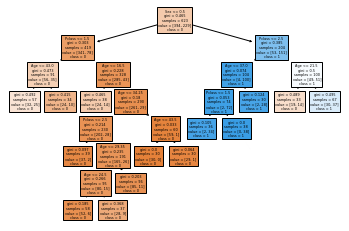

<Figure size 1800x1440 with 0 Axes>

In [18]:
#Now tha you ve found the best parameters, try it with the descision tree
DTC_best = DecisionTreeClassifier(max_depth = best_depth, min_samples_leaf=best_min_samples_leaf, max_leaf_nodes=best_max_leaf_nodes)
#Train part
DTC_best = DTC_best.fit(X_train, Y_train)
tree.plot_tree(DTC_best,feature_names=X.columns, filled=True, class_names=['0','1'])
plt.figure(figsize=(25,20))
#Predict the X_test
Y_pred = DTC_best.predict(X_test)

#\Calculate the accuracy
print(f"Tree best accuracy : {DTC_best.score(X_test, Y_test)}")

In [21]:
#LET'S CHANGE THE PARAMS
# Train and predict.
depth_grid = [1,5]
min_samples_leaf_grid =  [2,10] #use only even number
max_leaf_nodes_grid = [2,10] #use only even number
parameters = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}
#Using Grid Search, find the best parameters with cv = 10

#Train step
model = DecisionTreeClassifier()
clf = GridSearchCV(model, parameters)
clf.fit(X_train, Y_train)
#Select the best parameters
best_depth = clf.best_params_['max_depth']
best_min_samples_leaf = clf.best_params_['min_samples_leaf']
best_max_leaf_nodes = clf.best_params_['max_leaf_nodes']

Tree best accuracy : 0.7985074626865671


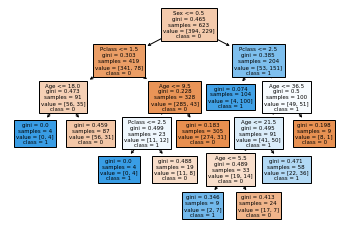

<Figure size 1800x1440 with 0 Axes>

In [22]:
#Now tha you ve found the best parameters, try it with the descision tree
DTC_best = DecisionTreeClassifier(max_depth = best_depth, min_samples_leaf=best_min_samples_leaf, max_leaf_nodes=best_max_leaf_nodes)
#Train part
DTC_best = DTC_best.fit(X_train, Y_train)
tree.plot_tree(DTC_best,feature_names=X.columns, filled=True, class_names=['0','1'])
plt.figure(figsize=(25,20))
#Predict the X_test
Y_pred = DTC_best.predict(X_test)

#\Calculate the accuracy
print(f"Tree best accuracy : {DTC_best.score(X_test, Y_test)}")

We can see that changing the parameters has improved the accuracy 

### RandomForest

In [23]:
n_estimators_grid = [20, 50] #only even numbers
depth_grid =  [1, 9]
min_samples_leaf_grid = [10, 20] #only even numbers
parameters = {'n_estimators': n_estimators_grid, 'max_depth': depth_grid, 'min_samples_leaf':min_samples_leaf_grid}

#Using Grid Search, find the best parameters with cv = 10

#Train part
model = RandomForestClassifier()
clf = GridSearchCV(model, parameters, cv=gridCV)
clf.fit(X_train, Y_train)
#Select the best parameters

best_n_estim = clf.best_params_['n_estimators']
best_depth = clf.best_params_['max_depth']
best_min_samples_leaf = clf.best_params_['min_samples_leaf']

In [24]:
#Now tha you ve found the best parameters, try it with Random Forest
RF_best = RandomForestClassifier(n_estimators=best_n_estim,max_depth=best_depth, min_samples_leaf=best_min_samples_leaf)

#Train part
RF_best = RF_best.fit(X_train, Y_train)

Y_pred = RF_best.predict(X_test)
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Random Forest best accuracy : 0.78


In [25]:
#let's change the number of estimators
n_estimators_grid = [10,20] #only even numbers
depth_grid =  [1, 9]
min_samples_leaf_grid = [10, 20] #only even numbers
parameters = {'n_estimators': n_estimators_grid, 'max_depth': depth_grid, 'min_samples_leaf':min_samples_leaf_grid}

#Using Grid Search, find the best parameters with cv = 10

#Train part
model = RandomForestClassifier()
clf = GridSearchCV(model, parameters, cv=gridCV)
clf.fit(X_train, Y_train)
#Select the best parameters

best_n_estim = clf.best_params_['n_estimators']
best_depth = clf.best_params_['max_depth']
best_min_samples_leaf = clf.best_params_['min_samples_leaf']

In [26]:
#Now tha you ve found the best parameters, try it with Random Forest
RF_best = RandomForestClassifier(n_estimators=best_n_estim,max_depth=best_depth, min_samples_leaf=best_min_samples_leaf)

#Train part
RF_best = RF_best.fit(X_train, Y_train)

Y_pred = RF_best.predict(X_test)
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Random Forest best accuracy : 0.799


Same remark, the accuracy has been improved